In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import keras
import tensorflow as tf


In [ ]:
keras.backend.backend()

'tensorflow'

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

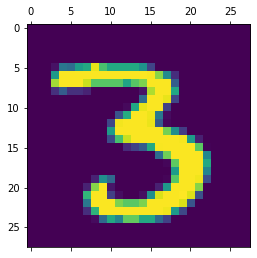

In [ ]:
plt.matshow(x_train[12])

In [ ]:
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [ ]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [ ]:
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:
model = keras.models.Sequential()

inputs = keras.Input(shape=(784,))
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
predictions (Dense)          (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(), 
              optimizer = keras.optimizers.Adam(learning_rate=0.01), 
              metrics = [keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
model.fit(x_train,y_train, epochs = 5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2514 - sparse_categorical_accuracy: 0.9240
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1549 - sparse_categorical_accuracy: 0.9544
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1345 - sparse_categorical_accuracy: 0.9613
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1243 - sparse_categorical_accuracy: 0.9654
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1128 - sparse_categorical_accuracy: 0.9683


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1747 - sparse_categorical_accuracy: 0.9539


[0.17472626268863678, 0.9538999795913696]

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_pred[0]

array([2.3085274e-10, 1.2963066e-07, 3.4049549e-07, 1.1362119e-06,
       6.4394830e-11, 2.1507829e-10, 5.0507670e-14, 9.9999833e-01,
       1.0130704e-11, 4.2877675e-09], dtype=float32)

In [ ]:
y_pred[12]

array([6.1926693e-11, 4.0545647e-11, 6.3177207e-12, 5.7746643e-09,
       9.1469112e-05, 1.2651897e-07, 1.1640710e-09, 8.5679011e-09,
       5.9975319e-10, 9.9990833e-01], dtype=float32)

In [ ]:
np.argmax(y_pred[12])

9